In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for improved aesthetics

In [7]:
# Get combined mechanistic and ml model results data
mech_ml_estimates = pd.read_excel('Example_data\Output\Predictions\mech_ml_estimates_20231112.xlsx')

In [80]:
# Combine the ML and Mechanistic data into a single DataFrame suitable for seaborn

# Rename columns and then melt the DataFrame
figure_data = pd.melt(mech_ml_estimates[['error_m', 'error_mech_bearing_m', 'mech_tri_northing_error']], var_name='Model Type', value_name='Error')

# Replace 'error_m' with 'ML model error' and 'error_mech_m' with 'Mechanistic model error' in the 'Model Type' column
figure_data['Model Type'] = figure_data['Model Type'].replace({'error_m': 'ML model', 'error_mech_bearing_m': 'Hybrid model', 'mech_tri_northing_error': 'Mechanistic model'})

# Convert 'Error' values to absolute values
figure_data['Error'] = figure_data['Error'].abs()

# Remove rows with NaN values in the 'Error' column and filter absolute values <= 5000
figure_data = figure_data.dropna(subset=['Error'])
figure_data = figure_data[figure_data['Error'] <= 5000]


In [84]:
figure_data

,Model Type,Error
0,ML model,106.180946
1,ML model,177.036472
2,ML model,165.847953
3,ML model,77.957966
4,ML model,238.699747
...,...,...
2119,Mechanistic model,123.429287
2125,Mechanistic model,745.093783
2130,Mechanistic model,309.843183
2133,Mechanistic model,215.913990


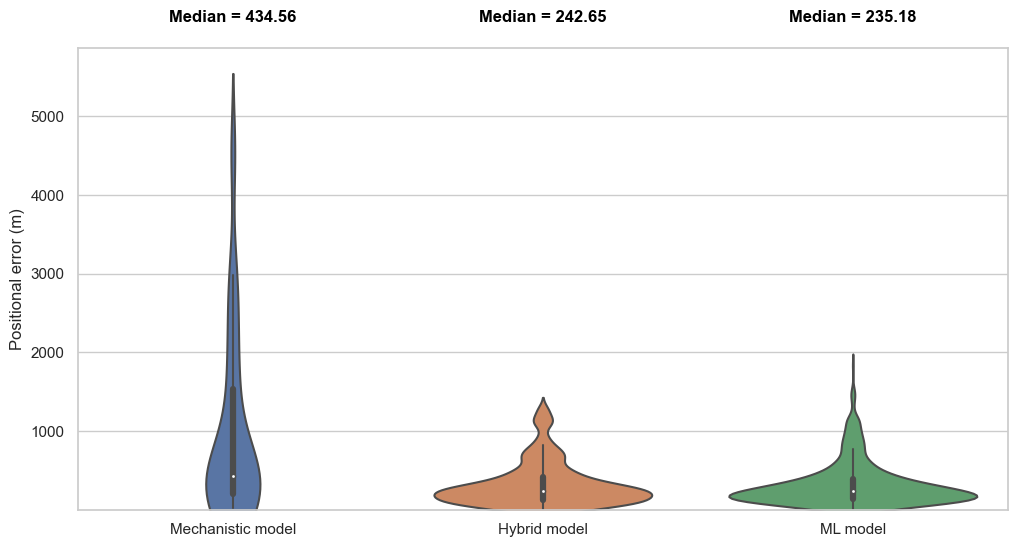

In [85]:
# Set the style with grid lines
sns.set(style="whitegrid")

# Set the figure size to make it wider
plt.figure(figsize=(12, 6))

# Reorder the Model Types
desired_order = ['Mechanistic model', 'Hybrid model', 'ML model']

# Create the boxplot with horizontal grid lines, set y-axis to log10 scale, and adjust y-axis limit
ax = sns.violinplot(data=figure_data, x="Model Type", y="Error", order=desired_order)
plt.ylim(bottom=0.1)  # Set the minimum y-axis value to 0.1 (adjust as needed)

# Label the y-axis
plt.ylabel("Positional error (m)")

# Calculate median values for each Model type
median_values = figure_data.groupby("Model Type")["Error"].median()

# Annotate the plot with median values
for i, model_type in enumerate(desired_order):
    median_val = median_values[model_type]
    ax.text(i, 1.05 * plt.ylim()[1], f"Median = {median_val:.2f}", ha='center', va='bottom', color='black', fontweight='bold')

# Remove x-axis title
plt.xlabel(None)

# Save the plot as an image file (PNG format in this example)
plt.savefig("C:/Users/s5236256/Google Drive/PhD/Presentations/AOC_2023/Figures/ML_vs_hybrid_vs_mech_error_plot_20231112", dpi=600, bbox_inches="tight")

# Show the plot
plt.show()


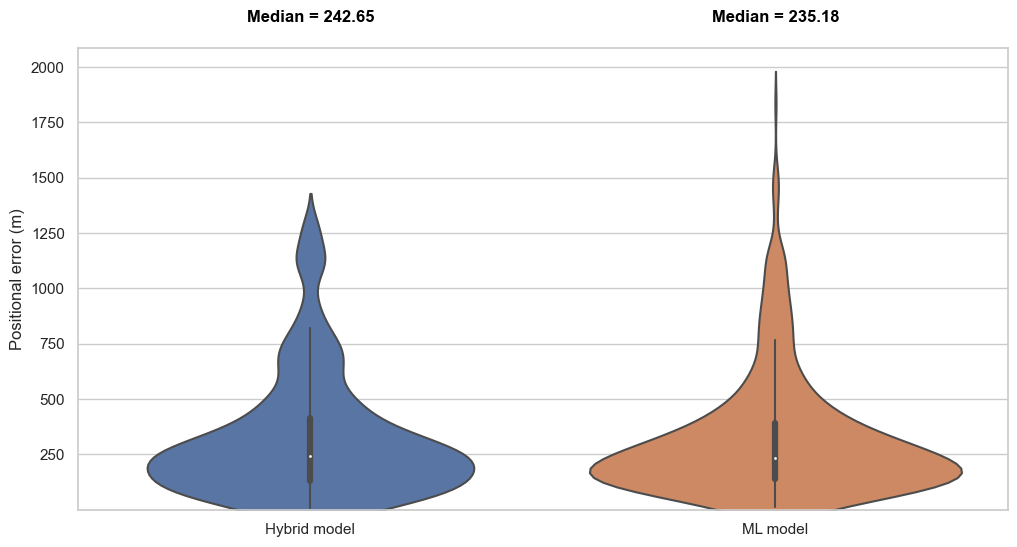

In [83]:
### Figure only for better performing model
# Filter figure_data for Model Type 'ML model' or 'Hybrid model'
figure_data_ml_hybrid = figure_data[figure_data['Model Type'].isin(['ML model', 'Hybrid model'])]

# Set the style with grid lines
sns.set(style="whitegrid")

# Set the figure size to make it wider
plt.figure(figsize=(12, 6))

# Reorder the Model Types
desired_order = ['Hybrid model', 'ML model']

# Create the boxplot with horizontal grid lines, set y-axis to log10 scale, and adjust y-axis limit
ax = sns.violinplot(data=figure_data_ml_hybrid, x="Model Type", y="Error", order=desired_order)
plt.ylim(bottom=0.1)  # Set the minimum y-axis value to 0.1 (adjust as needed)

# Label the y-axis
plt.ylabel("Positional error (m)")

# Calculate median values for each Model type
median_values = figure_data_ml_hybrid.groupby("Model Type")["Error"].median()

# Annotate the plot with median values
for i, model_type in enumerate(desired_order):
    median_val = median_values[model_type]
    plt.text(i, 1.05 * plt.ylim()[1], f"Median = {median_val:.2f}", ha='center', va='bottom', color='black', fontweight='bold')
    
# Remove x-axis title
plt.xlabel(None)

# # Save the plot as an image file (PNG format in this example)
plt.savefig("C:/Users/s5236256/Google Drive/PhD/Presentations/AOC_2023/Figures/ML_vs_hybrid_error_plot_20231112", dpi=600, bbox_inches="tight")

# Show the plot
plt.show()


<Figure size 640x480 with 0 Axes>

In [ ]:
# Calculations for the number of positions that could be estimated using the mechanistic model

# Filter mech_ml_estimates to include the ml estimates based on a combined dataset and for which the mechanistic model
# was able to estiamte a location
mech_ml_estimates_successful_estimates = mech_ml_estimates[(mech_ml_estimates['training_data_type'] == 'Combined') & (~mech_ml_estimates['error_mech_m'].isna()) & (mech_ml_estimates['error_mech_m'] != '')]


In [4]:
mech_ml_estimates

,DateTime,TagID,easting,northing,easting_pred,northing_pred,Tower_count,Data_type,Signal_count,xOffset,...,northing_error,error_m,mean_distance_from_tower,training_data_type,inteval_seconds,easting_estimated_mech,northing_estimated_mech,easting_mech_error,northing_mech_error,error_mech_m
0,2021-02-02 07:51:00,60,423203.210195,7.575845e+06,423128.694243,7.575921e+06,2,Tracked bird,4,60.785672,...,75.642357,106.180946,78.187231,Combined,13,NaN,NaN,NaN,NaN,NaN
1,2021-02-02 07:54:00,60,423203.210195,7.575845e+06,423065.351077,7.575734e+06,2,Tracked bird,15,60.785672,...,-111.071042,177.036472,78.187231,Combined,13,NaN,NaN,NaN,NaN,NaN
2,2021-02-04 18:36:00,52,427298.584493,7.565190e+06,427436.823929,7.565282e+06,4,Tracked bird,31,-168.960554,...,91.626425,165.847953,292.368227,Combined,13,429709.251945,7.563588e+06,2410.667452,-1601.962361,2894.40857
3,2021-02-04 18:39:00,52,427298.584493,7.565190e+06,427376.232446,7.565197e+06,4,Tracked bird,10,-168.960554,...,6.945487,77.957966,292.368227,Combined,13,NaN,NaN,NaN,NaN,NaN
4,2021-02-10 16:09:00,50,423203.210195,7.575845e+06,423398.945954,7.575982e+06,4,Simulated bird,20,48.473880,...,136.620209,238.699747,70.702270,Combined,13,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,2023-05-23 10:42:00,192,421233.248221,7.573822e+06,421073.286576,7.574000e+06,1,Tracked bird,58,103.510404,...,177.991583,239.308862,195.221734,Simulated bird,3,NaN,NaN,NaN,NaN,NaN
734,2023-05-23 10:45:00,192,421233.248221,7.573822e+06,421073.286576,7.574001e+06,1,Tracked bird,56,103.510404,...,179.315599,240.295260,195.221734,Simulated bird,3,NaN,NaN,NaN,NaN,NaN
735,2023-05-23 10:48:00,192,421233.248221,7.573822e+06,421073.286576,7.573993e+06,1,Tracked bird,54,103.510404,...,171.636033,234.620237,195.221734,Simulated bird,3,NaN,NaN,NaN,NaN,NaN
736,2023-05-23 10:51:00,192,421233.248221,7.573822e+06,421073.286576,7.573991e+06,1,Tracked bird,44,103.510404,...,169.006520,232.703527,195.221734,Simulated bird,3,NaN,NaN,NaN,NaN,NaN
